<a href="https://www.kaggle.com/code/georgevelkov/logistic-regression-titanic?scriptVersionId=114014677" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt

Note: largely following AICVS tutorial for data cleaning and prep. Available at: https://aicvscummins.weebly.com/home/tutorial-to-approach-the-titanic-dataset

### Load Data

In [2]:
# read csv files into pandas dataframes
train_df = pd.read_csv('/kaggle/input/titanic/train.csv')
test_df = pd.read_csv('/kaggle/input/titanic/test.csv')

In [3]:
combine = [train_df, test_df]
combine

[     PassengerId  Survived  Pclass  \
 0              1         0       3   
 1              2         1       1   
 2              3         1       3   
 3              4         1       1   
 4              5         0       3   
 ..           ...       ...     ...   
 886          887         0       2   
 887          888         1       1   
 888          889         0       3   
 889          890         1       1   
 890          891         0       3   
 
                                                   Name     Sex   Age  SibSp  \
 0                              Braund, Mr. Owen Harris    male  22.0      1   
 1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
 2                               Heikkinen, Miss. Laina  female  26.0      0   
 3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
 4                             Allen, Mr. William Henry    male  35.0      0   
 ..                                               

In [4]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
print(train_df.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [6]:
# show datatypes for every column
print(train_df.dtypes)

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [7]:
# print some statistics
print(train_df.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [8]:
print(train_df.describe(include=['O']))

                           Name   Sex  Ticket    Cabin Embarked
count                       891   891     891      204      889
unique                      891     2     681      147        3
top     Braund, Mr. Owen Harris  male  347082  B96 B98        S
freq                          1   577       7        4      644


In [9]:
# show missing values for every column
print("Missing values")
print("AGE: ", train_df['Age'].isna().sum())
print("CABIN: ",train_df['Cabin'].isna().sum())
print("PASSENGER_ID: ",train_df['PassengerId'].isna().sum())
print("PARCH: ",train_df['Parch'].isna().sum())
print("SEX: ",train_df['Sex'].isna().sum())
print("FARE: ",train_df['Fare'].isna().sum())
print("SURVIVED: ",train_df['Survived'].isna().sum())
print("PCLASS: ",train_df['Pclass'].isna().sum())
print("SIBSB: ",train_df['SibSp'].isna().sum())
print("Ticket: ",train_df['Ticket'].isna().sum())
print("EMBARKED: ",train_df['Embarked'].isna().sum())
print("NAME: ",train_df['Name'].isna().sum())

Missing values
AGE:  177
CABIN:  687
PASSENGER_ID:  0
PARCH:  0
SEX:  0
FARE:  0
SURVIVED:  0
PCLASS:  0
SIBSB:  0
Ticket:  0
EMBARKED:  2
NAME:  0


### **Data Cleaning**

In [10]:
# change the missing values to the mean value for the "Age" column
# this will not affect the pattern negatively
mean_age = train_df["Age"].mean()
train_df.fillna({'Age': mean_age}, inplace=True)

In [11]:
# change the missing values for the "Embarked" column to the most frequent value
# this will not affect the pattern negatively and there are just two NaN values
train_df["Embarked"].fillna(train_df["Embarked"].value_counts().idxmax(), inplace=True)

In [12]:
# the column "Cabin" has too many missing values so it is getting dropped altogether
train_df.drop(["Cabin"], axis=1, inplace=True)

In [13]:
# check for remaining missing values
train_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [14]:
# convert categorical features into numerical ones
training_df = pd.get_dummies(train_df,columns=["Sex", "Pclass", "Embarked"])
training_df.drop(["Sex_female"], axis=1, inplace=True) # surplus feature
training_df

,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Sex_male,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,1,0,"Braund, Mr. Owen Harris",22.000000,1,0,A/5 21171,7.2500,1,0,0,1,0,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.000000,1,0,PC 17599,71.2833,0,1,0,0,1,0,0
2,3,1,"Heikkinen, Miss. Laina",26.000000,0,0,STON/O2. 3101282,7.9250,0,0,0,1,0,0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.000000,1,0,113803,53.1000,0,1,0,0,0,0,1
4,5,0,"Allen, Mr. William Henry",35.000000,0,0,373450,8.0500,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,"Montvila, Rev. Juozas",27.000000,0,0,211536,13.0000,1,0,1,0,0,0,1
887,888,1,"Graham, Miss. Margaret Edith",19.000000,0,0,112053,30.0000,0,1,0,0,0,0,1
888,889,0,"Johnston, Miss. Catherine Helen ""Carrie""",29.699118,1,2,W./C. 6607,23.4500,0,0,0,1,0,0,1
889,890,1,"Behr, Mr. Karl Howell",26.000000,0,0,111369,30.0000,1,1,0,0,1,0,0


#### Repeat for test set

In [15]:
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [16]:
# check for missing values in test set
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [17]:
# data cleaning for test_df
mean_age = test_df["Age"].mean()
test_df.fillna({'Age': mean_age}, inplace=True)

In [18]:
test_df.drop(["Cabin"], axis=1, inplace=True)

In [19]:
testing_df = pd.get_dummies(test_df,columns=["Sex", "Pclass", "Embarked"])
testing_df.drop(["Sex_female"], axis=1, inplace=True) # surplus feature
testing_df

,PassengerId,Name,Age,SibSp,Parch,Ticket,Fare,Sex_male,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,892,"Kelly, Mr. James",34.50000,0,0,330911,7.8292,1,0,0,1,0,1,0
1,893,"Wilkes, Mrs. James (Ellen Needs)",47.00000,1,0,363272,7.0000,0,0,0,1,0,0,1
2,894,"Myles, Mr. Thomas Francis",62.00000,0,0,240276,9.6875,1,0,1,0,0,1,0
3,895,"Wirz, Mr. Albert",27.00000,0,0,315154,8.6625,1,0,0,1,0,0,1
4,896,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.00000,1,1,3101298,12.2875,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,"Spector, Mr. Woolf",30.27259,0,0,A.5. 3236,8.0500,1,0,0,1,0,0,1
414,1306,"Oliva y Ocana, Dona. Fermina",39.00000,0,0,PC 17758,108.9000,0,1,0,0,1,0,0
415,1307,"Saether, Mr. Simon Sivertsen",38.50000,0,0,SOTON/O.Q. 3101262,7.2500,1,0,0,1,0,0,1
416,1308,"Ware, Mr. Frederick",30.27259,0,0,359309,8.0500,1,0,0,1,0,0,1


### Feature Selection

In [20]:
# drop irrelevant features
# "Name", "Ticket", "PassengerId" do not affect the survival rate -> drop them
training_df.drop(["Name"], axis=1, inplace=True)
testing_df.drop(["Name"], axis=1, inplace=True)
training_df.drop(["Ticket"], axis=1, inplace=True)
testing_df.drop(["Ticket"], axis=1, inplace=True)
training_df.drop(["PassengerId"], axis=1, inplace=True)
testing_df.drop(["PassengerId"], axis=1, inplace=True)

In [21]:
# combine "SibSp" and "Parch" into one feature that determines if person was travelling alone
training_df['Alone'] = np.where((training_df["SibSp"] + training_df["Parch"]) > 0, 0, 1)

In [22]:
testing_df['Alone'] = np.where((testing_df["SibSp"] + testing_df["Parch"]) > 0, 0, 1)

In [23]:
# now "SibSp" and "Parch" can be dropped
training_df.drop(["SibSp"], axis=1, inplace=True)
testing_df.drop(["SibSp"], axis=1, inplace=True)
training_df.drop(["Parch"], axis=1, inplace=True)
testing_df.drop(["Parch"], axis=1, inplace=True)

In [24]:
# final check for missing values
training_df.isnull().sum()

Survived      0
Age           0
Fare          0
Sex_male      0
Pclass_1      0
Pclass_2      0
Pclass_3      0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
Alone         0
dtype: int64

In [25]:
testing_df.isnull().sum()

Age           0
Fare          1
Sex_male      0
Pclass_1      0
Pclass_2      0
Pclass_3      0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
Alone         0
dtype: int64

In [26]:
# there is a single remaining NaN value in the testing set
# The median fare value will be used to fill the missing value
testing_df["Fare"].fillna(testing_df["Fare"].median(), inplace=True)

### Model

The problem requires to predict if a person survives the disaster or not
-> a Binary Classification problem. The model that I will use is Logistic Regression.

In [27]:
# split into training and testing set 
X_train, X_test, y_train, y_test = train_test_split(
    training_df.drop('Survived', axis=1), training_df['Survived'], 
    test_size=0.2, random_state=101)

In [28]:
# load the Logistic Regression model
lr_model = LogisticRegression()

#### Train

In [29]:
lr_model.fit(X_train,y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [30]:
predict = lr_model.predict(X_test)

#### Visualise results

In [31]:
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

           0       0.79      0.92      0.85        99
           1       0.88      0.70      0.78        80

    accuracy                           0.82       179
   macro avg       0.83      0.81      0.81       179
weighted avg       0.83      0.82      0.82       179



Confusion matrix for Logistic Regression
[[91  8]
 [24 56]]




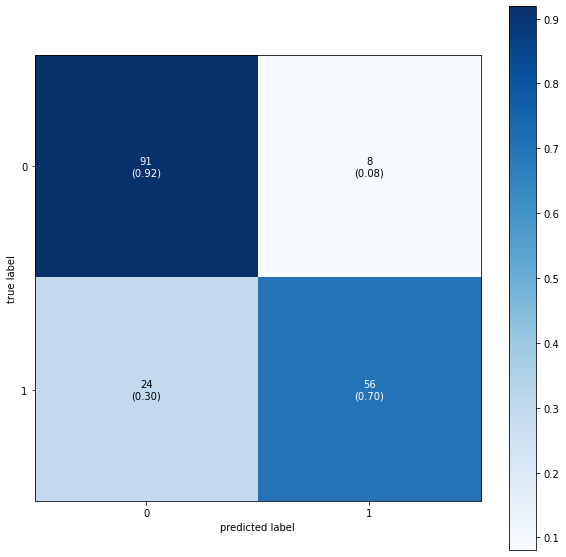

In [32]:
# confusion matrix
print("Confusion matrix for Logistic Regression")
matrix = confusion_matrix(y_test, predict)
print(matrix)
print('\n')

fig, ax = plot_confusion_matrix(conf_mat=matrix,figsize=(10, 10),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

#### On Test Data

In [33]:
prediction = lr_model.predict(testing_df)

In [34]:
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.50000,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.00000,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.00000,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.00000,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.00000,1,1,3101298,12.2875,S
...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,30.27259,0,0,A.5. 3236,8.0500,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.00000,0,0,PC 17758,108.9000,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.50000,0,0,SOTON/O.Q. 3101262,7.2500,S
416,1308,3,"Ware, Mr. Frederick",male,30.27259,0,0,359309,8.0500,S


In [35]:
final_preds = pd.DataFrame(prediction)
final_preds.rename(columns={0:'Survived'}, inplace=True)
final_preds = pd.concat([test_df['PassengerId'], final_preds], axis=1)
final_preds

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [36]:
final_preds["Survived"].value_counts()

0    275
1    143
Name: Survived, dtype: int64

Finally convert the predistions dataframe to CSV for submission

In [37]:
final_preds.to_csv('titanic_predictions.csv', index=False)